## Assignment

In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season. A look at the data Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season. Download 'nba_2013.csv' file from this link: https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0 Here are some selected columns from the data: player - name of the player pos - the position of the player g - number of games the player was in gs - number of games the player started pts - total points the player scored There are many more columns in the data, mostly containing information about average player game performance over the course of the season. See this site for an explanation of the rest of them. We can read our dataset in and figure out which columns are present:

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score

In [3]:

with open("nba_2013.csv", 'r') as csvfile:
    dfNBA = pd.read_csv(csvfile)

In [4]:
dfNBA.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


## Find significantly important columns from int or float type

In [5]:
dfCorr = dfNBA.corr()

In [6]:
dfCorr.shape

(27, 27)

In [7]:
# highly correlated dataframe
dfCorr2 = dfCorr[(dfCorr['pts'] > 0.5) | (dfCorr['pts'] < - 0.5)]

In [8]:
dfCorr2.drop('pts', inplace=True)
dfCorr2.drop('season_end', axis=1, inplace=True)
dfCorr2

C:\Users\epadhak\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
g,-0.012074,1.000000,0.610951,0.864487,0.739993,0.746963,0.322201,0.518074,0.537011,0.103762,...,0.252328,0.546902,0.707389,0.682688,0.551128,0.709650,0.475581,0.713508,0.865797,0.728462
gs,0.025163,0.610951,1.000000,0.860036,0.821619,0.811531,0.234677,0.501808,0.515718,0.063468,...,0.178607,0.560067,0.774892,0.735738,0.636059,0.743178,0.505589,0.767107,0.725573,0.810294
mp,0.007961,0.864487,0.860036,1.000000,0.931120,0.936883,0.273682,0.645056,0.666126,0.138230,...,0.278872,0.576844,0.821145,0.774492,0.733041,0.852331,0.506254,0.885406,0.884484,0.927464
fg,-0.009749,0.739993,0.821619,0.931120,1.000000,0.988262,0.278007,0.597239,0.613988,0.110514,...,0.277730,0.562293,0.820259,0.769339,0.708228,0.786597,0.484208,0.903383,0.798769,0.992041
fga,-0.018304,0.746963,0.811531,0.936883,0.988262,1.000000,0.211174,0.662004,0.685535,0.152111,...,0.312489,0.487154,0.771821,0.710910,0.748141,0.803290,0.412738,0.910689,0.786560,0.989211
x3p,0.050611,0.518074,0.501808,0.645056,0.597239,0.662004,-0.025510,1.000000,0.991700,0.462709,...,0.369515,-0.065822,0.280171,0.182848,0.617553,0.592092,-0.043707,0.560520,0.446711,0.655342
x3pa,0.028850,0.537011,0.515718,0.666126,0.613988,0.685535,-0.041720,0.991700,1.000000,0.449886,...,0.370768,-0.058075,0.291838,0.193712,0.643211,0.622973,-0.040987,0.589799,0.463455,0.672076
x2p,-0.028862,0.684729,0.785619,0.863941,0.960853,0.924781,0.333179,0.351640,0.374057,-0.032484,...,0.193893,0.679022,0.860592,0.834779,0.613292,0.713556,0.580246,0.860769,0.777982,0.931493
x2pa,-0.035970,0.694243,0.784812,0.874109,0.962059,0.944490,0.283523,0.382531,0.408290,-0.013775,...,0.221246,0.637025,0.836051,0.803959,0.647796,0.726077,0.536007,0.875709,0.777085,0.937036
ft,-0.046554,0.598333,0.707049,0.805468,0.893619,0.887922,0.217450,0.503353,0.527835,0.059541,...,0.271157,0.462211,0.704035,0.654005,0.699452,0.720571,0.383611,0.872003,0.663557,0.927618


In [9]:
#Sort dataframe by column pts
dfCorr2.sort_values(by='pts', ascending=False)
dfCorr2

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
g,-0.012074,1.000000,0.610951,0.864487,0.739993,0.746963,0.322201,0.518074,0.537011,0.103762,...,0.252328,0.546902,0.707389,0.682688,0.551128,0.709650,0.475581,0.713508,0.865797,0.728462
gs,0.025163,0.610951,1.000000,0.860036,0.821619,0.811531,0.234677,0.501808,0.515718,0.063468,...,0.178607,0.560067,0.774892,0.735738,0.636059,0.743178,0.505589,0.767107,0.725573,0.810294
mp,0.007961,0.864487,0.860036,1.000000,0.931120,0.936883,0.273682,0.645056,0.666126,0.138230,...,0.278872,0.576844,0.821145,0.774492,0.733041,0.852331,0.506254,0.885406,0.884484,0.927464
fg,-0.009749,0.739993,0.821619,0.931120,1.000000,0.988262,0.278007,0.597239,0.613988,0.110514,...,0.277730,0.562293,0.820259,0.769339,0.708228,0.786597,0.484208,0.903383,0.798769,0.992041
fga,-0.018304,0.746963,0.811531,0.936883,0.988262,1.000000,0.211174,0.662004,0.685535,0.152111,...,0.312489,0.487154,0.771821,0.710910,0.748141,0.803290,0.412738,0.910689,0.786560,0.989211
x3p,0.050611,0.518074,0.501808,0.645056,0.597239,0.662004,-0.025510,1.000000,0.991700,0.462709,...,0.369515,-0.065822,0.280171,0.182848,0.617553,0.592092,-0.043707,0.560520,0.446711,0.655342
x3pa,0.028850,0.537011,0.515718,0.666126,0.613988,0.685535,-0.041720,0.991700,1.000000,0.449886,...,0.370768,-0.058075,0.291838,0.193712,0.643211,0.622973,-0.040987,0.589799,0.463455,0.672076
x2p,-0.028862,0.684729,0.785619,0.863941,0.960853,0.924781,0.333179,0.351640,0.374057,-0.032484,...,0.193893,0.679022,0.860592,0.834779,0.613292,0.713556,0.580246,0.860769,0.777982,0.931493
x2pa,-0.035970,0.694243,0.784812,0.874109,0.962059,0.944490,0.283523,0.382531,0.408290,-0.013775,...,0.221246,0.637025,0.836051,0.803959,0.647796,0.726077,0.536007,0.875709,0.777085,0.937036
ft,-0.046554,0.598333,0.707049,0.805468,0.893619,0.887922,0.217450,0.503353,0.527835,0.059541,...,0.271157,0.462211,0.704035,0.654005,0.699452,0.720571,0.383611,0.872003,0.663557,0.927618


### find columns which has no covariance among themselves

In [10]:

nonCovarianceColumns = set()

for i in dfCorr2.drop(columns='pts').index.values:
    for j in dfCorr2[i].index.values:
        if(dfCorr2[j][i] < 1):
            if((dfCorr2[j][i] < 0.5) & (dfCorr2[j][i] > -0.5)):
                nonCovarianceColumns.add(i)

In [11]:
significantImportantColumns = list(nonCovarianceColumns)

In [12]:
dfNBA[significantImportantColumns].head()

,x2pa,tov,x2p,trb,pf,ast,drb,stl,x3p,ft,fga,fta,x3pa,orb
0,126,30,62,216,122,28,144,23,4,35,141,53,15,72
1,185,71,93,332,203,43,190,40,0,79,185,136,0,142
2,275,39,143,306,108,38,204,24,0,76,275,119,0,102
3,711,146,336,262,136,248,230,35,128,274,1011,336,300,32
4,248,63,136,277,187,40,183,23,0,56,249,67,1,94


In [13]:
dfNBA.describe(include='object')

,player,pos,bref_team_id,season
count,481,481,481,481
unique,481,7,31,1
top,Jordan Hill,SG,TOT,2013-2014
freq,1,109,63,481


in above, three columns are not important ==> season has just 1 value, player is unique and team id is a ID. Lets plot boxplot for pos column

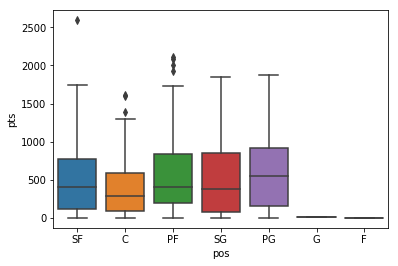

In [14]:
sns.boxplot(x='pos', y='pts', data=dfNBA)

#### from above it looks like, G and F has very low values. Points mean for all other players with PG is good than all other types 
#### Lets keep this column but values in this column are already as columns in this dataframe. So we can drop this as well

#### Lets split data

In [15]:

X_train, X_test, y_train, y_test = train_test_split(dfNBA[significantImportantColumns], dfNBA['pts'], test_size = 0.3, random_state = 100)

In [16]:

knnModel = KNeighborsRegressor(n_neighbors=5)

In [17]:
knnModel.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [18]:

y_predicted = knnModel.predict(X_test)

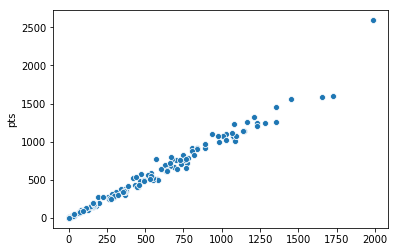

In [19]:
sns.scatterplot(y_predicted, y_test)

In [20]:

print('Root mean error in predicting number of points is {}'.format(mean_absolute_error(y_predicted, y_test)))

Root mean error in predicting number of points is 38.42068965517242


#### Lets see if keeping all columns impact the performance of the KNN model

In [22]:
dfNBA2 = dfNBA.select_dtypes(include=['int64', 'float64']).drop(columns='season_end').dropna()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(dfNBA2.drop(columns='pts'), dfNBA2['pts'], test_size = 0.3, random_state = 100)

In [24]:
knnModel = KNeighborsRegressor(n_neighbors=5)

In [25]:
knnModel.fit(X_train, y_train)
y_predicted = knnModel.predict(X_test)
print('Root mean error in predicting number of points is {}'.format(mean_absolute_error(y_predicted, y_test)))

Root mean error in predicting number of points is 56.02148760330577


#### Conclusion
Performance of the KNN model with only significant variables is better than keeping reduntant variables. 
KNN model predicts points scored by player with 38 as standard deviation or error vs 56 if all the variables kept in the model